# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240503

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [2]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [3]:
input = '/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids+lymphoids_leiden_clustered_muon_ac240507.raw.h5mu'
mdata_data = mu.read_h5mu(input)
mdata_data

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [4]:
adata = mdata_data.mod["rna"]
adata

AnnData object with n_obs × n_vars = 44586 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs

,cell_source,donor,n_counts,sample,seed_labels,condition,genotype,infection,library,model,...,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,C_scANVI,leiden,classification,lineage
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,DOCK4+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.019995,-0.083225,6,1,reference,DOCK4+MØ,3,DOCK4+MØ_3,myeloid
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.169221,-0.390143,6,4,reference,Monocytes,3,DOCK4+MØ_3,myeloid
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.317631,-0.578955,7,4,reference,Monocytes,6,Monocytes_6,myeloid
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.370103,-0.370084,7,2,reference,LYVE1+MØ,2,LYVE1+MØ_2,myeloid
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.0,-0.142503,-0.357287,7,2,reference,LYVE1+MØ,2,LYVE1+MØ_2,myeloid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,12119.0,Ttn_HetKO_MCMV_1,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.0,-0.267751,-0.531946,25,5,query,B,9,B_9,lymphoid
TTTGGAGAGATTAGCA-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,20506.0,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,...,23.0,2.905558,0.470866,21,5,query,B,2,B_2,lymphoid
TTTGGTTAGCACCTGC-1-B2,AG_Gerull,Ttn_HetKO_MCMV_2,3174.0,Ttn_HetKO_MCMV_2,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.0,0.000996,-0.736926,26,5,query,CD8,7,CD8_7,lymphoid
TTTGTTGAGACCTCCG-1-B2,AG_Gerull,Ttn_HetKO_noninf_2,4549.0,Ttn_HetKO_noninf_2,Unknown,Ttn_HetKO_noninf,Ttn_HetKO,noninf,B2,Ttn,...,0.0,-0.428444,-0.362500,29,5,query,B,13,B_13,lymphoid


In [6]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO'], dtype='object')

In [7]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [8]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf','Ttn_Ctr_MCMV', 'Ttn_HetKO_MCMV' ]
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf', 'Ttn_Ctr_MCMV',
       'Ttn_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="classification",
    sample_identifier="sample",
    covariate_obs=["genotype", "infection", "condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 44616 × 29414
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 36
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

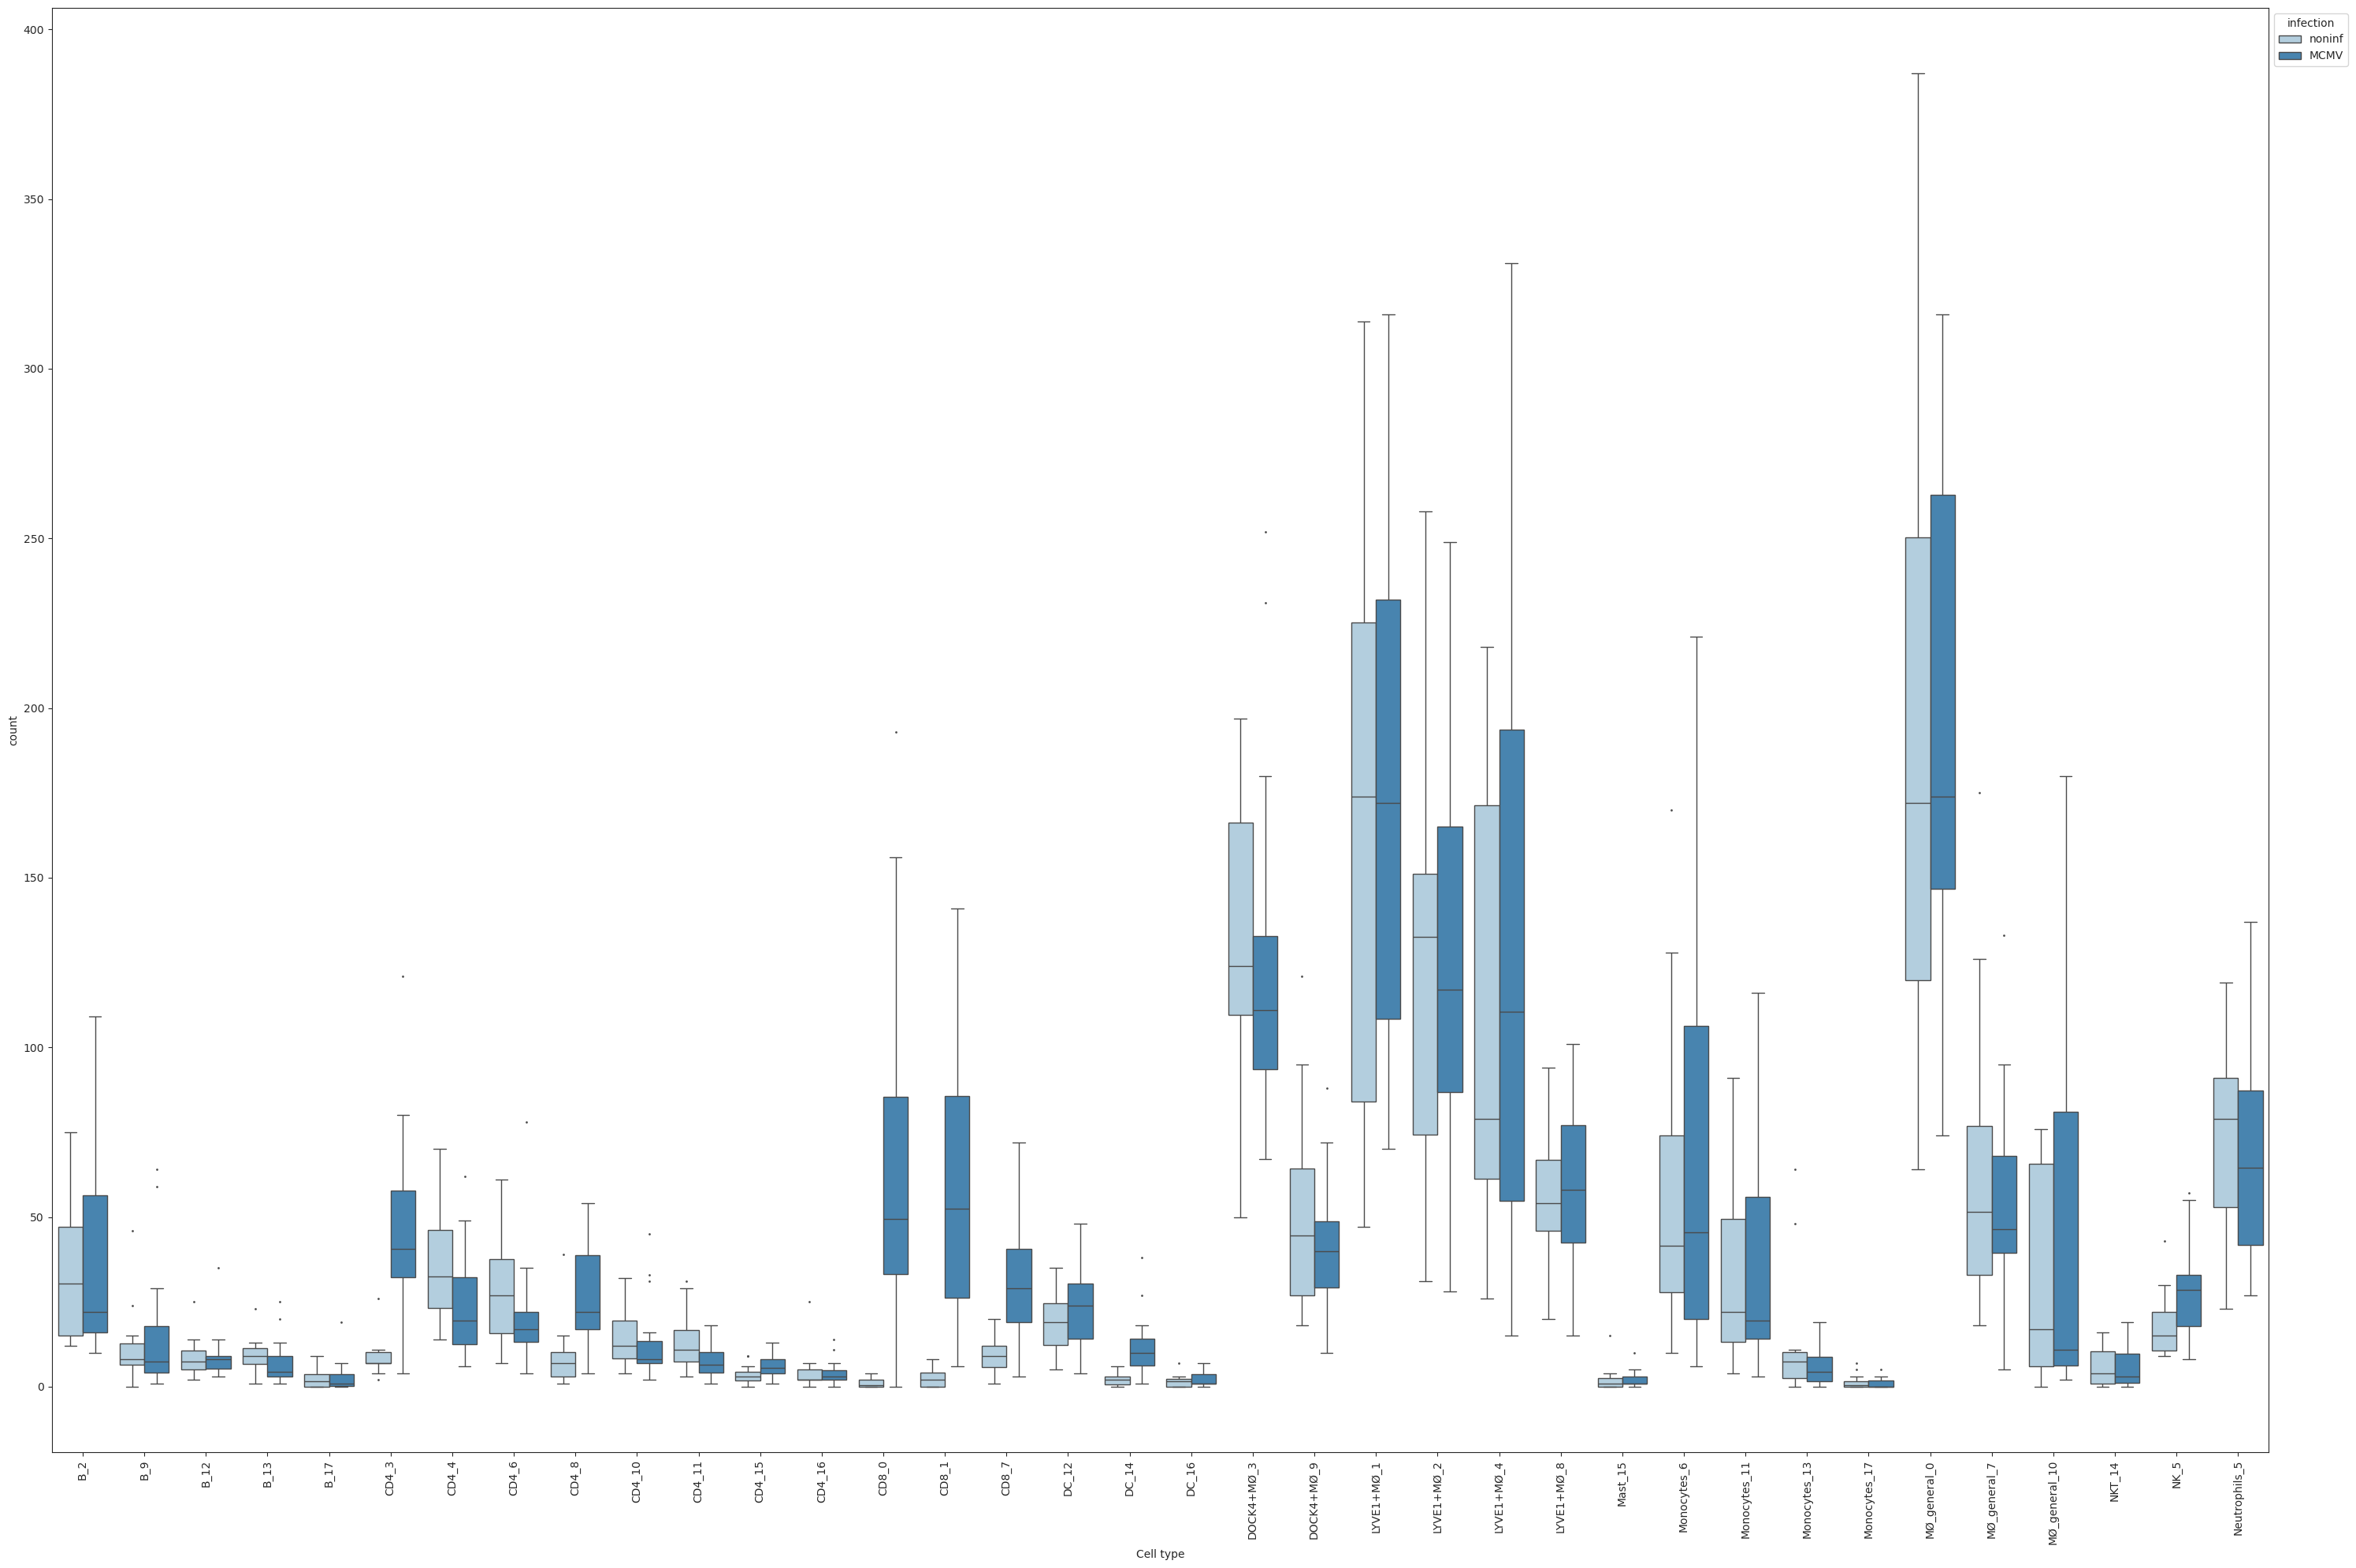

In [10]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

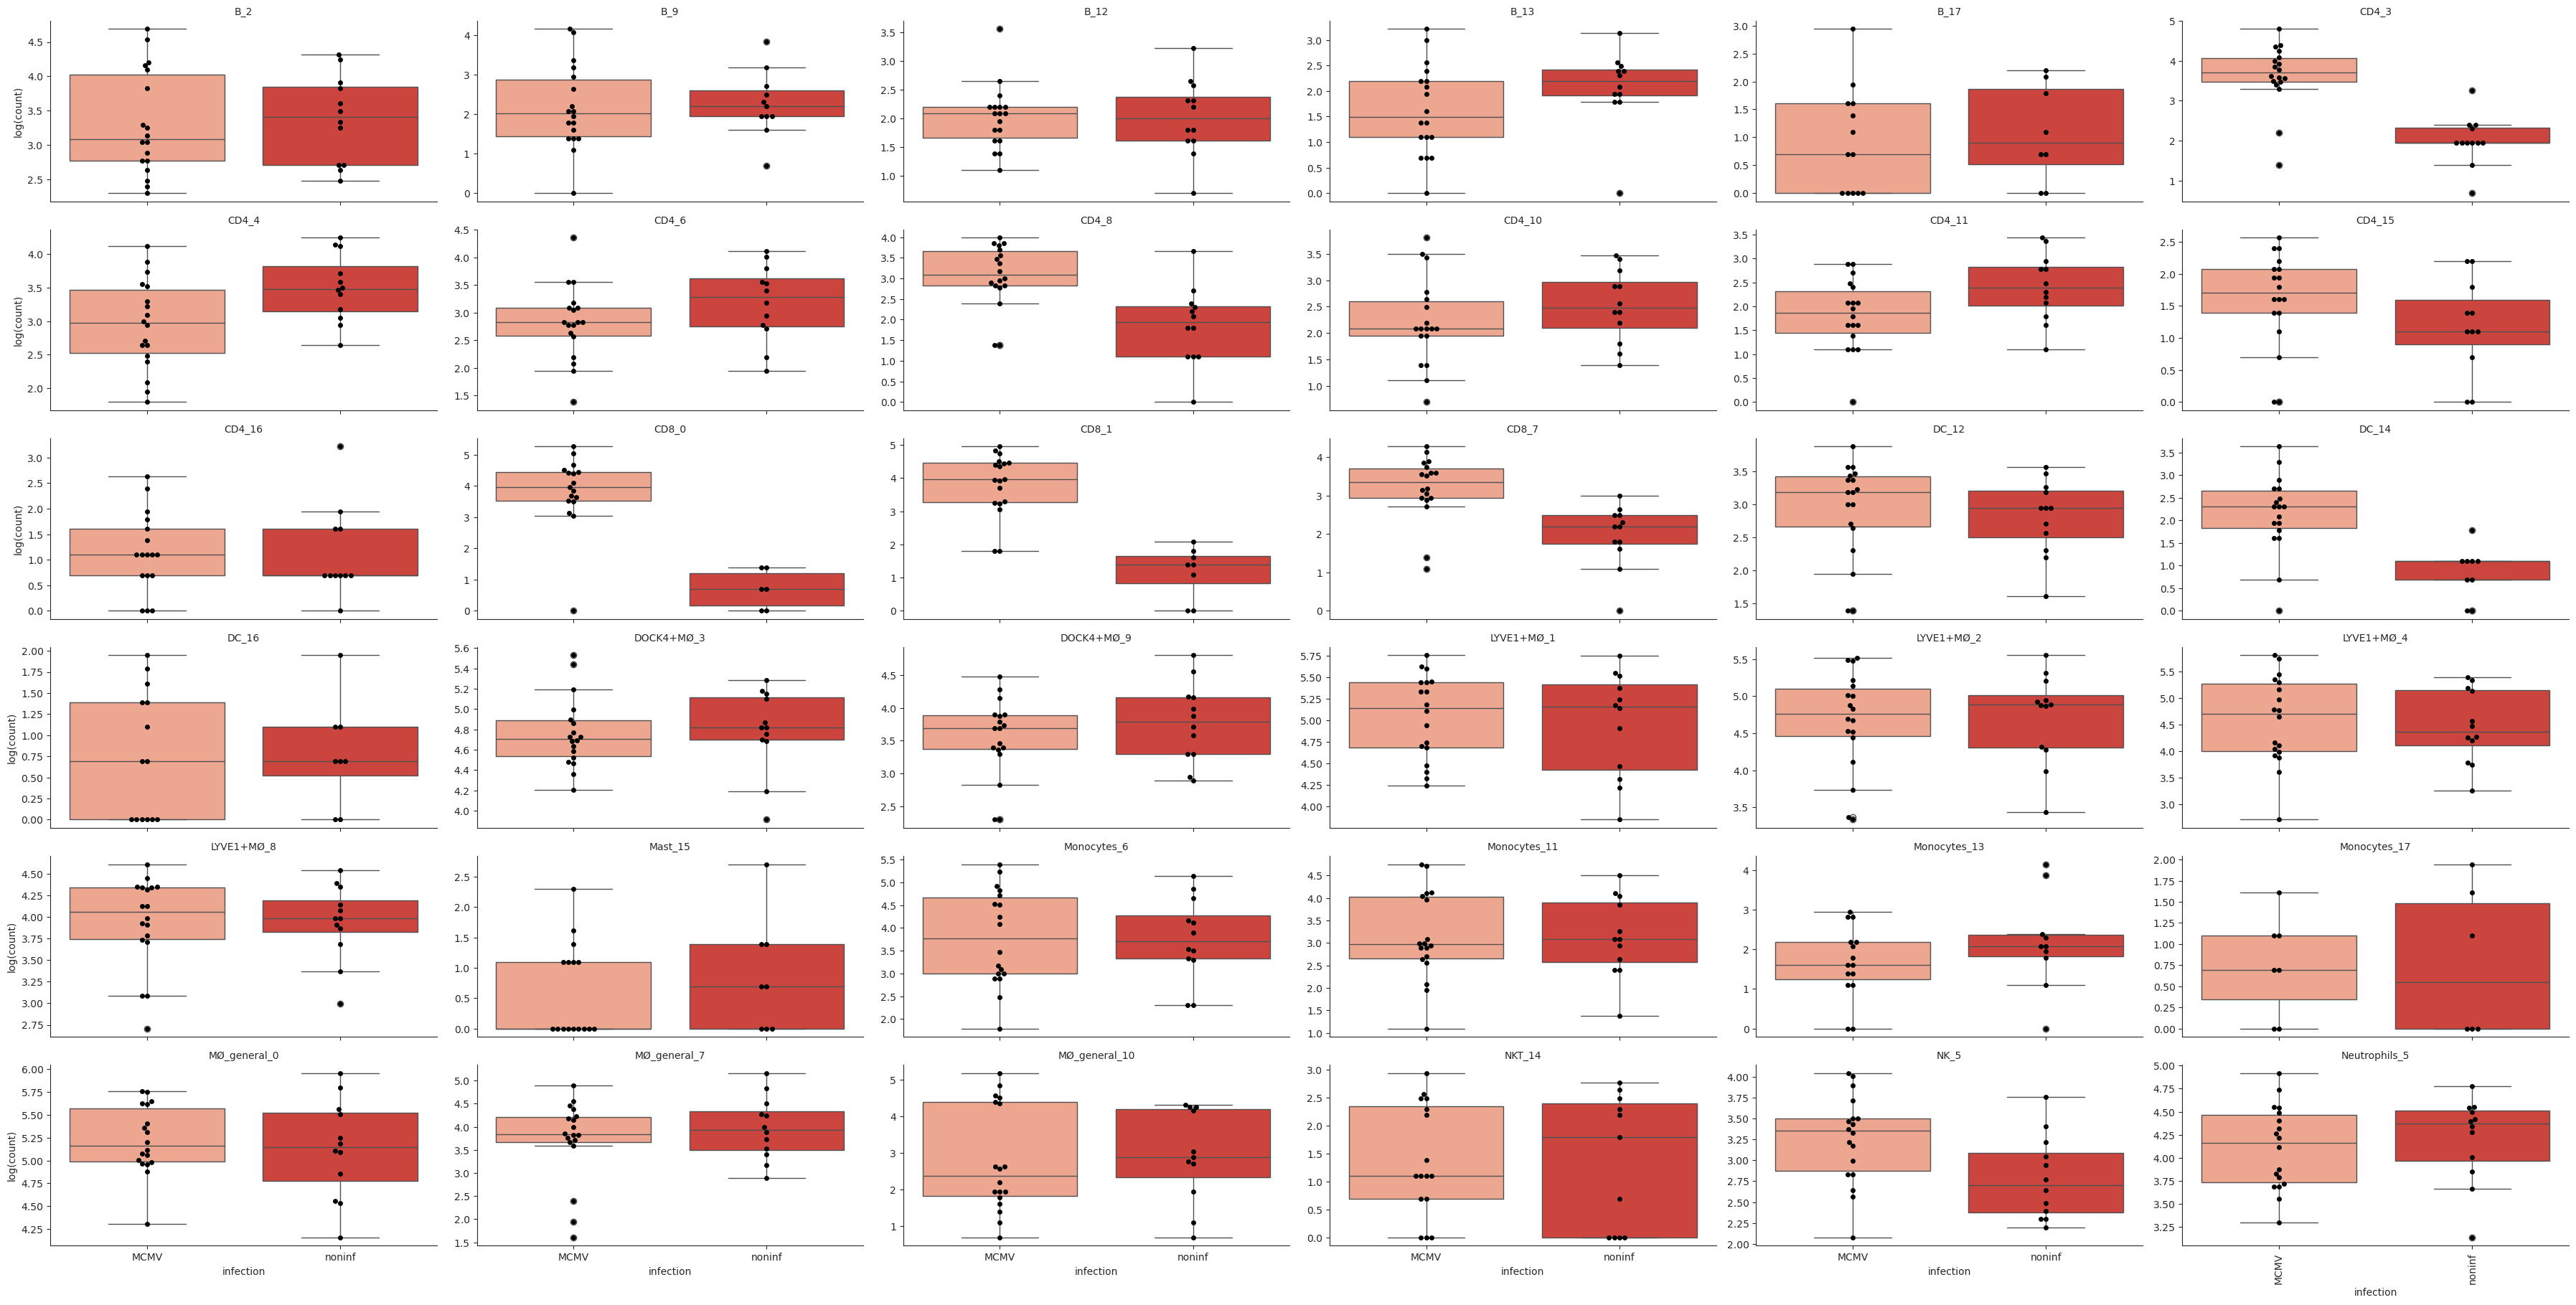

In [11]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.show()

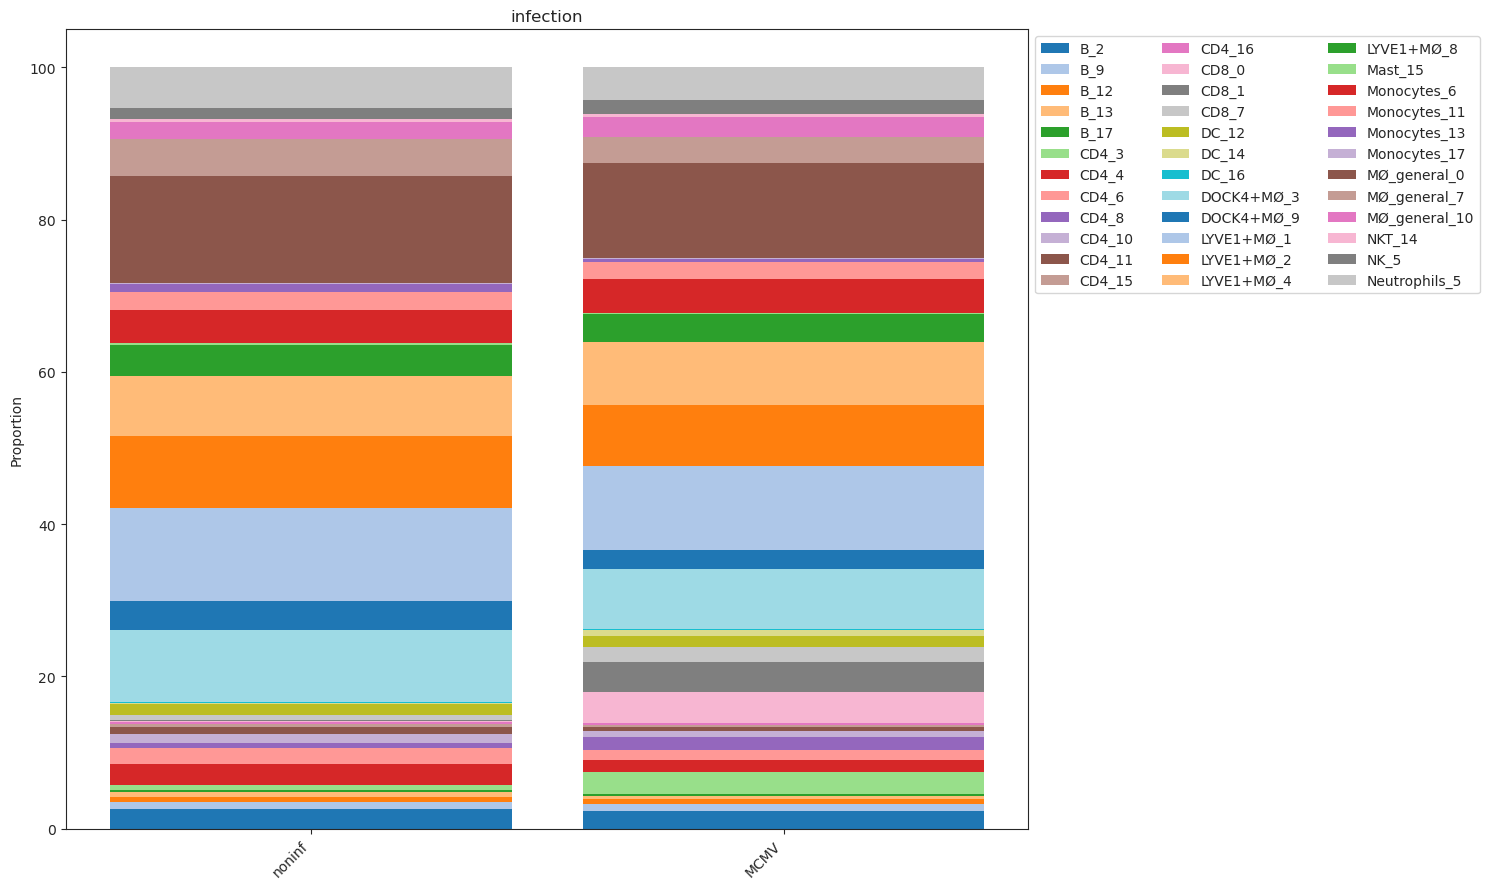

In [12]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="infection", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [13]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="infection",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to CD4_15

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 30 × 36
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [14]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
sample: 100%|██████████| 11000/11000 [08:10<00:00, 22.42it/s, 511 steps of size 1.05e-02. acc. prob=0.89] 


In [15]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 30 × 36
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_infection[T.MCMV]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [16]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 30 samples, 36 cell types                                    │
│ Reference cell type                        │ CD4_15                                                             │
│ Formula                                    │ infection                                                          │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                Final Parameter  Expected Sample                                                                 │
│ Cell Type                                                                                                       │
│ B_2                 1.261           37.885                                                                      │
│ B_9                 0.299           14.477                                                                      │
│ B_12                0.210           13.244                                                                      │
│ B_13                0.136           12.299                                                                      │
│ B_17               -0.637            5.678                                                                      │
│ CD4_3               0.263           13.965                                                                      │
│ CD4_4               1.312           39.867                                                                      │
│ CD4_6               1.005           29.328                                                                      │
│ CD4_8               0.161           12.611                                                                      │
│ CD4_10              0.478           17.315                                                                      │
│ CD4_11              0.346           15.174                                                                      │
│ CD4_15             -0.179            8.976                                                                      │
│ CD4_16             -0.378            7.356                                                                      │
│ CD8_0              -0.712            5.267                                                                      │
│ CD8_1              -0.469            6.716                                                                      │
│ CD8_7               0.230           13.512                                                                      │
│ DC_12               0.855           25.243                                                                      │
│ DC_14              -0.567            6.089                                                                      │
│ DC_16              -0.703            5.315                                                                      │
│ DOCK4+MØ_3          2.577          141.253                                                                      │
│ DOCK4+MØ_9          1.551           50.631                                                                      │
│ LYVE1+MØ_1          2.805          177.426                                                                      │
│ LYVE1+MØ_2          2.510          132.099                                                                      │
│ LYVE1+MØ_4          2.350          112.568                                                                      │
│ LYVE1+MØ_8          1.795           64.622                                                                      │
│ Mast_15            -0.683            5.422                                                                      │
│ Monocytes_6         1.669           56.972                                                                      │
│ Monocytes_11        1.106           32.445                                                                      │
│ Monocytes_13       -0.046           10.253                                                                      │
│ Monocytes_17       -0.882            4.444            

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Final Parameter  Expected Sample  log2-fold change                               │
│ Covariate       Cell Type                                                                                       │
│ infectionT.MCMV B_2                 0.000           34.157            -0.149                                    │
│                 B_9                 0.000           13.052            -0.149                                    │
│                 B_12                0.000           11.941            -0.149                                    │
│                 B_13                0.000           11.089            -0.149                                    │
│                 B_17                0.000            5.119            -0.149                                    │
│                 CD4_3               1.238           43.430             1.637                                    │
│                 CD4_4              -0.456           22.792            -0.807                                    │
│                 CD4_6               0.000           26.442            -0.149                                    │
│                 CD4_8               0.843           26.425             1.067                                    │
│                 CD4_10              0.000           15.611            -0.149                                    │
│                 CD4_11              0.000           13.680            -0.149                                    │
│                 CD4_15              0.000            8.093            -0.149                                    │
│                 CD4_16              0.000            6.632            -0.149                                    │
│                 CD8_0               2.308           47.755             3.180                                    │
│                 CD8_1               2.141           51.528             2.940                                    │
│                 CD8_7               0.889           29.648             1.134                                    │
│                 DC_12               0.000           22.759            -0.149                                    │
│                 DC_14               0.875           13.164             1.112                                    │
│                 DC_16               0.000            4.792            -0.149                                    │
│                 DOCK4+MØ_3          0.000          127.353            -0.149                                    │
│                 DOCK4+MØ_9          0.000           45.648            -0.149                                    │
│                 LYVE1+MØ_1          0.000          159.966            -0.149                                    │
│                 LYVE1+MØ_2          0.000          119.100            -0.149                                    │
│                 LYVE1+MØ_4          0.000          101.490            -0.149                                    │
│                 LYVE1+MØ_8          0.000           58.263            -0.149                                    │
│                 Mast_15             0.000            4.889            -0.149                                    │
│                 Monocytes_6         0.000           51.365            -0.149                                    │
│                 Monocytes_11        0.000           29.252            -0.149                                    │
│                 Monocytes_13        0.000            9.244            -0.149                                    │
│                 Monocytes_17        0.000            4

### Filter out credible effects

In [17]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate          Cell Type    
infection[T.MCMV]  B_2              False
                   B_9              False
                   B_12             False
                   B_13             False
                   B_17             False
                   CD4_3             True
                   CD4_4             True
                   CD4_6            False
                   CD4_8             True
                   CD4_10           False
                   CD4_11           False
                   CD4_15           False
                   CD4_16           False
                   CD8_0             True
                   CD8_1             True
                   CD8_7             True
                   DC_12            False
                   DC_14             True
                   DC_16            False
                   DOCK4+MØ_3       False
                   DOCK4+MØ_9       False
                   LYVE1+MØ_1       False
                   LYVE1+MØ_2       False
 

##### Adjust the "false discovery rate"

In [18]:
#If needed adjust the 'false discovery rate' - default is 0.05, however when no effects are detected it can be incresed to up to 0.2
sccoda_model.set_fdr(sccoda_data, 0.2)
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate          Cell Type    
infection[T.MCMV]  B_2              False
                   B_9              False
                   B_12             False
                   B_13             False
                   B_17             False
                   CD4_3             True
                   CD4_4             True
                   CD4_6             True
                   CD4_8             True
                   CD4_10           False
                   CD4_11            True
                   CD4_15           False
                   CD4_16           False
                   CD8_0             True
                   CD8_1             True
                   CD8_7             True
                   DC_12            False
                   DC_14             True
                   DC_16            False
                   DOCK4+MØ_3       False
                   DOCK4+MØ_9       False
                   LYVE1+MØ_1       False
                   LYVE1+MØ_2       False
 

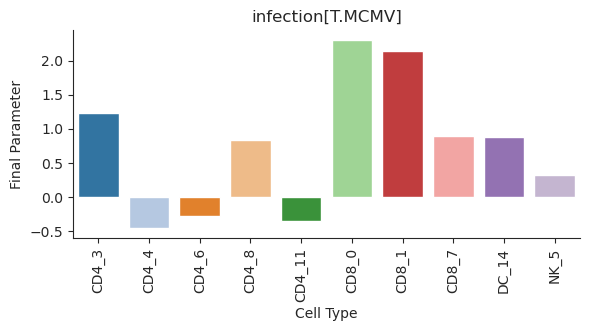

In [19]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

In [20]:
sccoda_data

MuData object with n_obs × n_vars = 44616 × 29414
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification', 'lineage'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'classification_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    coda:	30 x 36
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_infection[T.MCMV]'

In [21]:
sccoda_data["coda"].varm["effect_df_infection[T.MCMV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_2,0.000000,-0.362,0.272,0.083,0.2309,34.176889,-0.148605
B_9,0.000000,-0.419,0.545,0.138,0.2824,13.059941,-0.148605
B_12,0.000000,-0.555,0.428,0.134,0.2820,11.947830,-0.148605
B_13,0.000000,-0.822,0.233,0.207,0.3647,11.095611,-0.148605
B_17,0.000000,-0.583,0.602,0.173,0.3086,5.122024,-0.148605
CD4_3,1.238193,0.752,1.730,0.249,1.0000,43.455734,1.637730
CD4_4,-0.455564,-0.789,0.003,0.270,0.7565,22.805123,-0.805845
CD4_6,-0.272972,-0.696,0.085,0.201,0.4230,20.137368,-0.542421
CD4_8,0.843348,0.317,1.380,0.281,0.9929,26.440515,1.068089


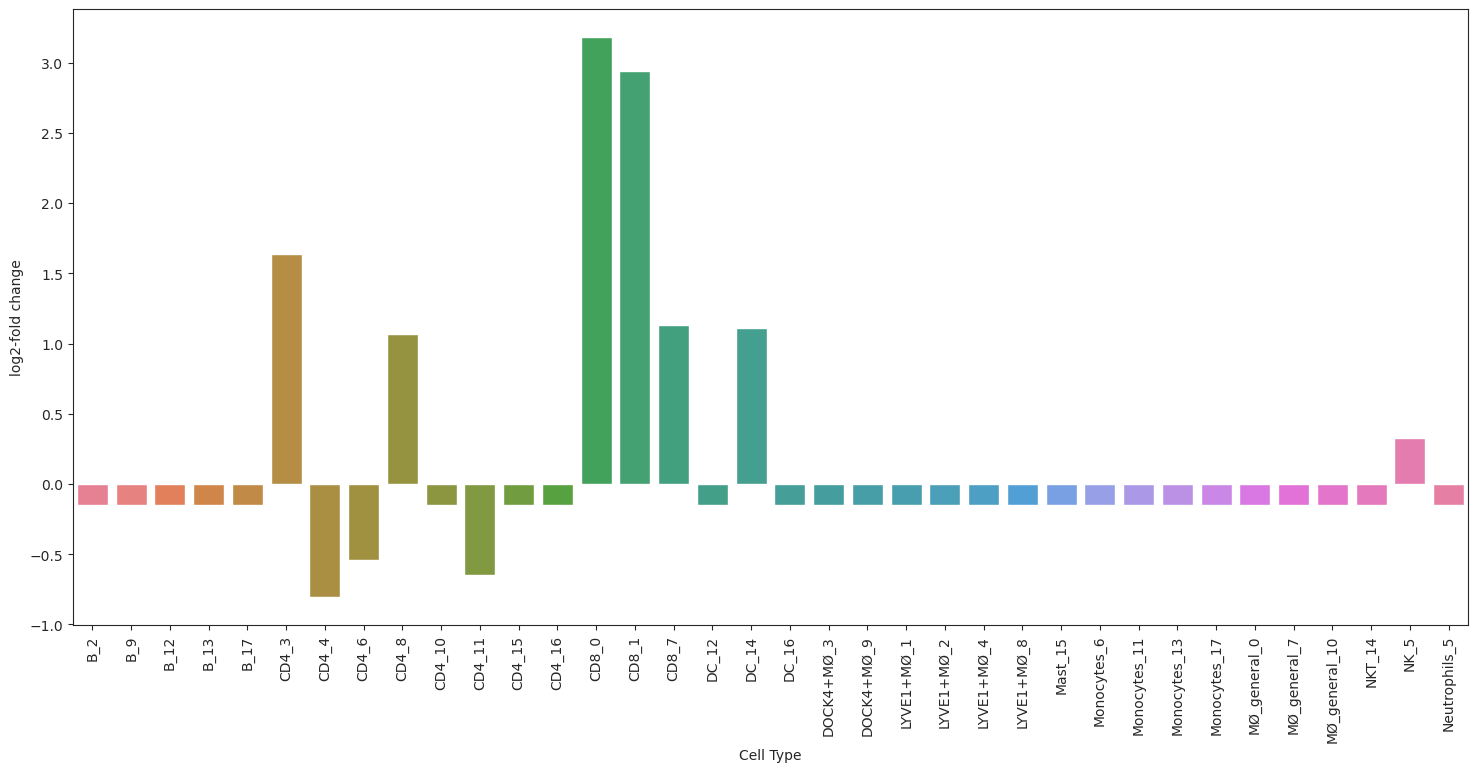

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_infection[T.MCMV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

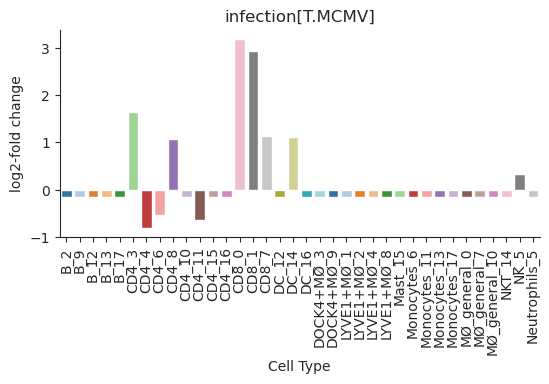

In [23]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "infection")
plt.show()